In [12]:
import re 
from nltk.tokenize import regexp_tokenize

this_string = "Y'all are amazing,and I've loved teaching this class"
pattern1 = r"\w+'\w+"
apost = regexp_tokenize(this_string, pattern1)
apost

["Y'all", "I've"]

1. Make sure you can get the API from class to work in Azure. Take a screenshot of it
working and add the image to a jupyter notebook.

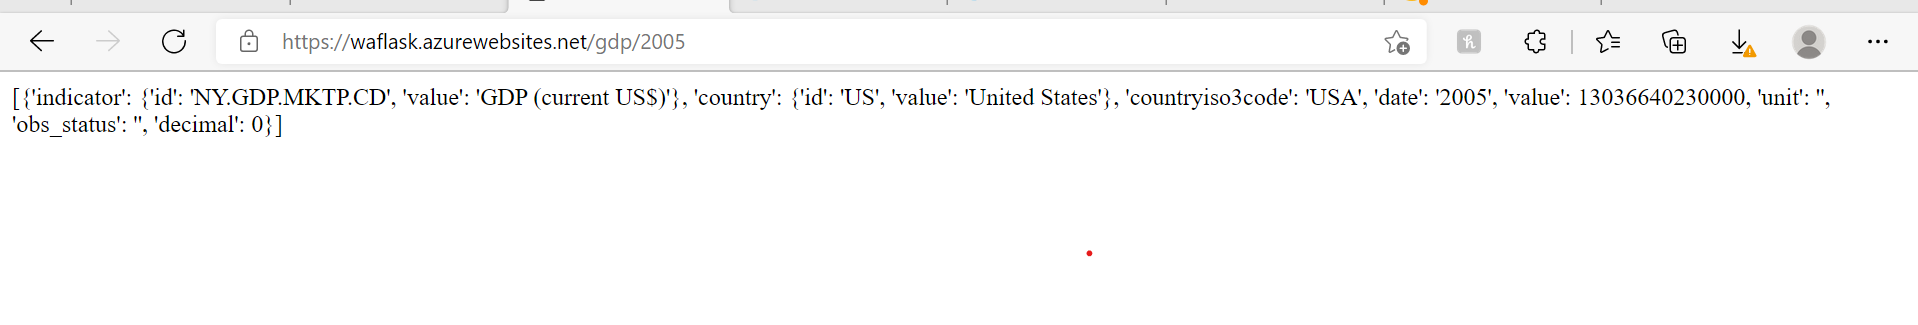

2. Loop through the API data in python using the /gdp/<year> endpoint for your API. What
does it look like? Is there a way to alter the html page to simplify what you see?

In [2]:
import numpy as np 
import pandas as pd

import json
import requests
import os

import matplotlib.pyplot as plt
from pandas.plotting import table
from pprint import pprint
import seaborn as sns


In [3]:
# Accesing my base api to show that it works
base_url = "https://waflask.azurewebsites.net"

req = requests.get(base_url)
print(req.text)

Hello World!


In [5]:
base_url = "https://waflask.azurewebsites.net/gdp"

req = requests.get(base_url)
data = req.text
print(data)

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <title>Flask Templates</title>
</head>

<body>
  <div class="container">
    <div class="jumbotron text-center">
      <!-- Render our data -->
      [{&#39;page&#39;: 1, &#39;pages&#39;: 1, &#39;per_page&#39;: 5000, &#39;total&#39;: 61, &#39;sourceid&#39;: &#39;2&#39;, &#39;sourcename&#39;: &#39;World Development Indicators&#39;, &#39;lastupdated&#39;: &#39;2021-06-30&#39;}, [{&#39;indicator&#39;: {&#39;id&#39;: &#39;NY.GDP.MKTP.CD&#39;, &#39;value&#39;: &#39;GDP (current US$)&#39;}, &#39;country&#39;: {&#39;id&#39;: &#39;US&#39;, &#39;value&#39;: &#39;United States&#39;}, &#39;countryiso3code&#39;: &#39;USA&#39;, &#39;date&#39;: &#39;2020&#39;, &#39;value&#39;: 20936600000000, &#39;unit&#39;: &#39;&#39;, &#39;obs_status&#39;: &#39;&#39;, &#39;decimal&#39;: 0}, {&#39;indicator&#39;: {&#39;id&#39;: &#39;NY.GDP.MKTP.CD&#39;, &#39;value&#39;: &#39;GDP (current US$)&#39;}, &#39;country&#39;: {&#39;id&#39;: &#39;US&#39;, &

In [6]:
ch = "["
index = data.find(ch,0)
length_d = len(data)
new_data = data[219:]
length_new = len(new_data)
print(length_d,length_new)

24409 24190


In [7]:
import re 
# set global string to hold cleaned up data
global data_out
data_out = ""

cleanr = re.compile('<.*?>')

def cleanhtml(raw_html):
    global data_out
    cleantext = re.sub(cleanr, '',raw_html).replace('&#39;',"'").replace('\n','').replace("'",'"')
    data_out = cleantext
    print(data_out)
    return

In [8]:
cleanhtml(new_data)

{"page": 1, "pages": 1, "per_page": 5000, "total": 61, "sourceid": "2", "sourcename": "World Development Indicators", "lastupdated": "2021-06-30"}, [{"indicator": {"id": "NY.GDP.MKTP.CD", "value": "GDP (current US$)"}, "country": {"id": "US", "value": "United States"}, "countryiso3code": "USA", "date": "2020", "value": 20936600000000, "unit": "", "obs_status": "", "decimal": 0}, {"indicator": {"id": "NY.GDP.MKTP.CD", "value": "GDP (current US$)"}, "country": {"id": "US", "value": "United States"}, "countryiso3code": "USA", "date": "2019", "value": 21433224697000, "unit": "", "obs_status": "", "decimal": 0}, {"indicator": {"id": "NY.GDP.MKTP.CD", "value": "GDP (current US$)"}, "country": {"id": "US", "value": "United States"}, "countryiso3code": "USA", "date": "2018", "value": 20611860934000, "unit": "", "obs_status": "", "decimal": 0}, {"indicator": {"id": "NY.GDP.MKTP.CD", "value": "GDP (current US$)"}, "country": {"id": "US", "value": "United States"}, "countryiso3code": "USA", "date